In [8]:
from qiskit import QuantumCircuit

        ┌───┐┌───┐ ░ ┌─┐
     q: ┤ H ├┤ H ├─░─┤M├
        └───┘└───┘ ░ └╥┘
meas: 1/══════════════╩═
                      0 


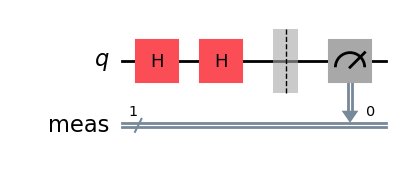

In [20]:
# Create a new circuit with q quantum registry
qc = QuantumCircuit(1)

# Add a Hadamard gate to qubit 0
qc.h(0)

qc.measure_all()

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.

print(qc.draw())

qc.draw(output="mpl")



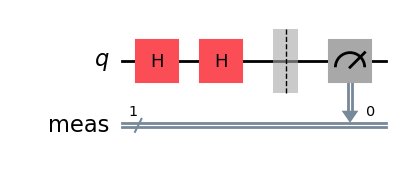

In [21]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import Aer

# Get specifications for the simulator
backend = Aer.get_backend('qasm_simulator')
target = backend.target

# Create a pass manager for transpilation. No optimization selecter
pass_manager = generate_preset_pass_manager(target=target, optimization_level=0, backend=backend)

# Transpile is to adapt the quntum circuit to the specified hardware
transpiled = pass_manager.run(qc)
 
# Draw it, excluding idle qubits from the diagram
# iqp IBM QUANTUM PROVIDER visualization style (modern and compact)
transpiled.draw("mpl", idle_wires=False, style="iqp")

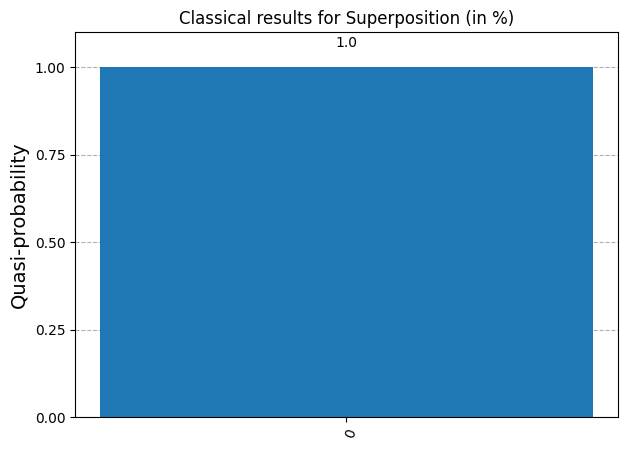

In [22]:
# Imports SamplerV2. Interface for execute circuits and get result distributions
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_histogram, plot_distribution

# Create a Sampler object to use the specified backend
# sampler.options.default_shots = 500
sampler = Sampler(mode=backend)

# Create a job to be executed locally or remote
job = sampler.run([transpiled], shots=500)

# Create histogram from job result
result = job.result()

# extract measure count
dist = result[0].data.meas.get_counts()
plot_distribution(dist, title="Classical results for Superposition (in %)")

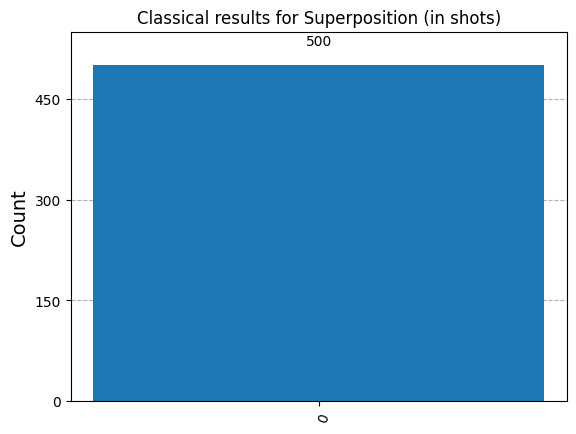

In [18]:
# plots raw raw count from results

plot_histogram(dist, title="Classical results for Superposition (in shots)")
